# 1. Data Loading and Exploration

This notebook is for loading the raw data, preprocessing it, and performing initial exploratory data analysis (EDA). We will use the functions created in the `src/` directory to keep this notebook clean and focused on analysis.

## 1.1 Imports and Setup

First, we import the necessary libraries. We also add the parent directory (`../`) to the system path so we can import our custom `.py` files from the `src/` folder.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the parent directory to the system path to allow imports from src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import our custom functions
from src.data_processing import load_data, preprocess_data

# Set plot styles
%matplotlib inline
sns.set_context('talk')
sns.set_style('whitegrid')

## 1.2 Load Data

Define the file paths and use our `load_data` function.

In [4]:
# Define file paths relative to the project root
FEATURES_PATH = '../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features.csv'
BARCODE_PATH = '../data/barcodes--5.25.2024_CBI.0010_York_Poplar.csv'

# Load the data
data_df, barcode_df = load_data(FEATURES_PATH, BARCODE_PATH)

print("Features data shape:", data_df.shape)
print("Barcode data shape:", barcode_df.shape)

Features data shape: (3407, 55)
Barcode data shape: (464, 5)


## 1.3 Preprocess Data

Now we use our `preprocess_data` function to merge the dataframes, convert dates, and calculate the `Decimal Days` and integer `Days_Since_2024_05_26` columns.

In [5]:
merged_df = preprocess_data(data_df, barcode_df, experiment_start_str='2024-05-26 00:00:00')

print("Merged data shape:", merged_df.shape)
merged_df.head()

Merged data shape: (3407, 63)


,Analyse Date,Round Order,Round Status,Plant Info,File Path,area,convex_hull_area,solidity,perimeter,width,...,value_min,value_max,Decimal Days,Plant.Genotype,Replication,Geno_Rep,Random,Plant.Info,Date,Days_Since_2024_05_26
0,2024-05-26 20:36:10,2,Ok,22_BESC-1126_2,2024-05-26\RgbImage_2024-05-26_20-36-09.png,126819.0,478733.5,0.264905,8204.657186,636,...,23.92,100.00,0.858449,BESC-1126,2,BESC-1126_2,22,22_BESC-1126_2,2024-05-26,0
1,2024-05-26 20:43:14,2,Ok,23_BESC-1207_2,2024-05-26\RgbImage_2024-05-26_20-43-13.png,11934.0,57606.0,0.207166,3994.230163,508,...,12.55,87.06,0.863356,BESC-1207,2,BESC-1207_2,23,23_BESC-1207_2,2024-05-26,0
2,2024-05-26 20:50:10,2,Ok,24_BESC-317_2,2024-05-26\RgbImage_2024-05-26_20-50-10.png,128635.0,649596.5,0.198023,13636.231066,688,...,16.08,85.10,0.868171,BESC-317,2,BESC-317_2,24,24_BESC-317_2,2024-05-26,0
3,2024-05-26 20:56:59,2,Ok,25_GW-9919_3,2024-05-26\RgbImage_2024-05-26_20-56-58.png,297067.0,1932310.5,0.153737,21186.480603,1426,...,17.65,97.65,0.872905,GW-9919,3,GW-9919_3,25,25_GW-9919_3,2024-05-26,0
4,2024-05-26 21:03:47,2,Ok,26_BESC-1068_5,2024-05-26\RgbImage_2024-05-26_21-03-46.png,393526.0,1755088.0,0.224220,23263.076905,1254,...,17.65,100.00,0.877627,BESC-1068,5,BESC-1068_5,26,26_BESC-1068_5,2024-05-26,0


In [6]:
# Check data types and for any missing values
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Analyse Date           3407 non-null   datetime64[ns]
 1   Round Order            3407 non-null   int64         
 2   Round Status           3407 non-null   object        
 3   Plant Info             3407 non-null   object        
 4   File Path              3407 non-null   object        
 5   area                   3407 non-null   float64       
 6   convex_hull_area       3407 non-null   float64       
 7   solidity               3407 non-null   float64       
 8   perimeter              3407 non-null   float64       
 9   width                  3407 non-null   int64         
 10  height                 3407 non-null   int64         
 11  longest_path           3407 non-null   int64         
 12  center_of_mass_x       3407 non-null   float64       
 13  cen

## 1.4 Exploratory Analysis (EDA)

Let's recreate some of the initial plots from the original notebook to understand our data.

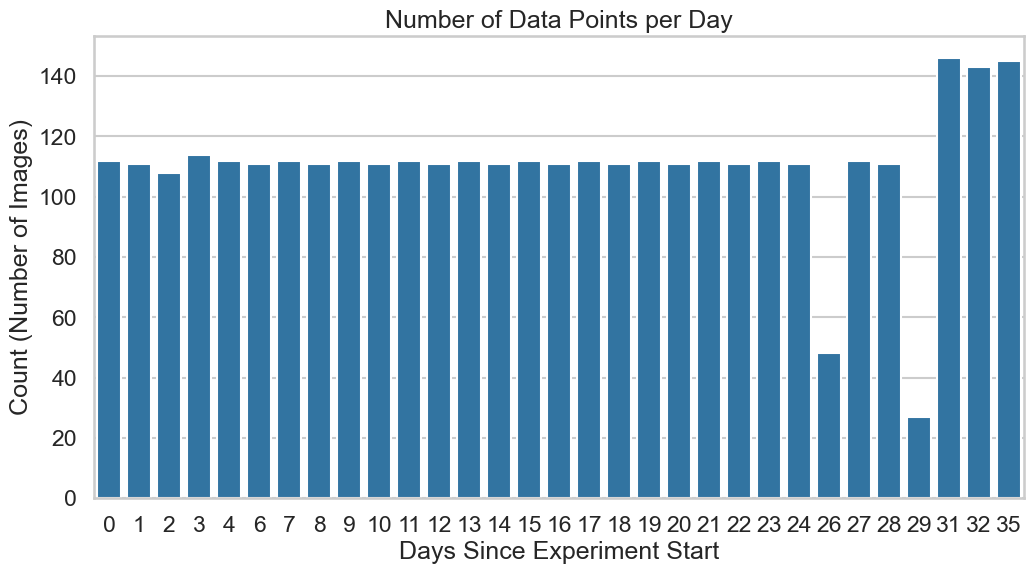

In [7]:
# Plot the number of data points (images) per day
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='Days_Since_2024_05_26')
plt.title('Number of Data Points per Day')
plt.xlabel('Days Since Experiment Start')
plt.ylabel('Count (Number of Images)')
plt.show()

### Plot Example Plants

Let's look at the raw (unscaled) growth data for a few individual plants to see the trajectories.

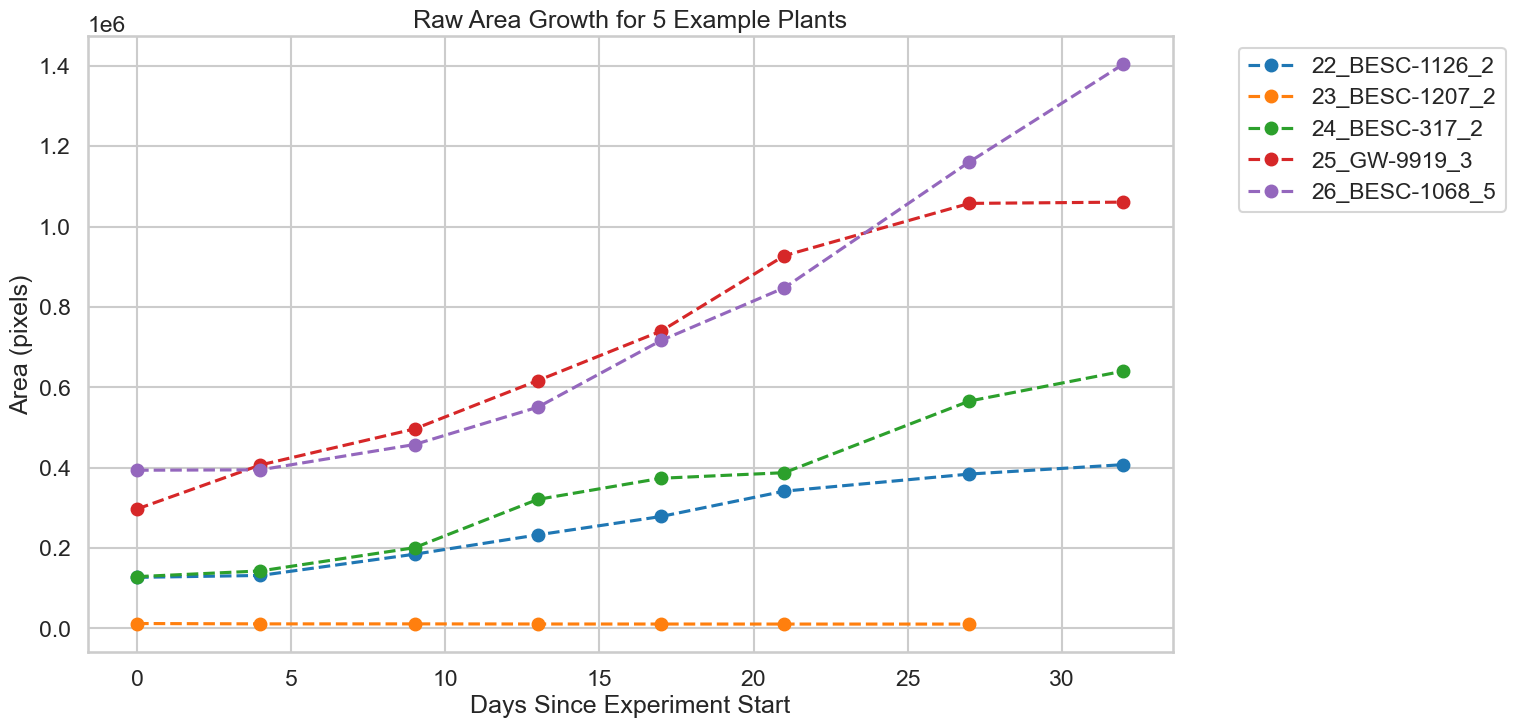

In [8]:
# Get a list of a few unique plant IDs to plot
plant_ids = merged_df['Plant Info'].unique()
example_plants = plant_ids[0:5] # Plot the first 5 plants

plt.figure(figsize=(14, 8))
for plant_id in example_plants:
    plant_data = merged_df[merged_df['Plant Info'] == plant_id]
    plt.plot(plant_data['Days_Since_2024_05_26'], 
             plant_data['area'], 
             marker='o', 
             linestyle='--', 
             label=plant_id)

plt.title('Raw Area Growth for 5 Example Plants')
plt.xlabel('Days Since Experiment Start')
plt.ylabel('Area (pixels)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## 1.5 Next Steps

The data is loaded and looks correct. We can see the individual growth curves and the data collection frequency.

**Next step:** `02_global_model_fitting.ipynb`